In [85]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential    # Importing Sequential Model
from keras.layers.core import Dense,Dropout, Activation  #  Importing  Dense Layers,Dropouts and Activation functions
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils  
np.random.seed(1671) # for reproducibility -> Once you put the same seed you get same patterns of random numbers.

In [86]:
# network and training
NB_EPOCH = 30 # 30-> times the model is exposed to the training set.
BATCH_SIZE = 300
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam()
N_HIDDEN = 128 # Neurons
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

### Load the Data:
<hr/>

In [92]:
train_file = "data/train.csv"
test_file = "data/test.csv"


train_df = (pd.read_csv(train_file).values).astype('float32')  # Pandas DataFrame
test_df  = (pd.read_csv(test_file).values).astype('float32')   # Pandas DataFrame

In [93]:
train_df.head(n=5) # labels and pixels --> For first 5 rows

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [94]:
test_df.head(n=5) # no labels here --> For first 5 rows

AttributeError: 'numpy.ndarray' object has no attribute 'head'

#### So each row of the Dataset is a sequence of ink intensity for the 784 pixels that represents square image with the size 28x28.


In [96]:
train_labels = train_df['label'].values.astype('int32')
train_images = train_df.iloc[:,1:]
test_images = test_df

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Show some digits from the input dataset:


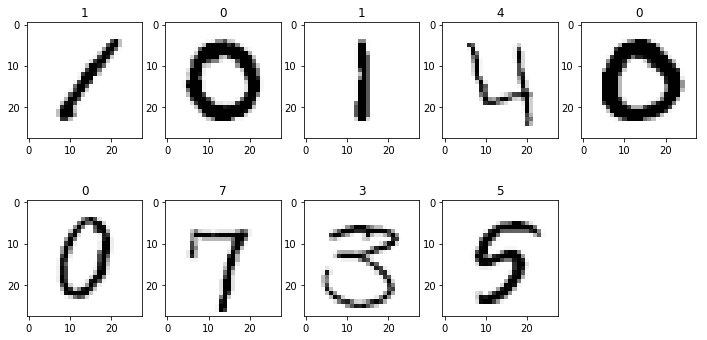

In [60]:
plt.figure(figsize=(12,6))
for i in range(0,9):
    plt.subplot(250 + (i+1))
    img = train_images.iloc[i,:].values.reshape(28, 28)
    plt.imshow(img, cmap='Greys')
    plt.title(train_labels[i])

# Preprocessing the digit images for Neural Network:

In [91]:
print("Train Images Shape:",train_images.shape)
print("Test Images Shape:",test_images.shape)

train_images = (train_images).astype('float32')
test_images = (test_images).astype('float32')
train_labels = (train_labels).astype('int32')

Train Images Shape: (42000, 784)
Test Images Shape: (28000, 784)


In [62]:
train_images.head(n=2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
test_images.head(n=2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
train_labels.head(n=10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int32

The output variable is an integer from 0 to 9. This is a <b>multiclass classification problem.</b>

In [65]:
# normalize -> Involve only rescaling to arrive at value relative to some size variables.

train_images /= 255 # Pixel values are 0 to 255 -> So we are normalizing training data by dividing it by 255
test_images /= 255

#### One Hot encoding of labels.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [66]:

train_labels = np_utils.to_categorical(train_labels, NB_CLASSES) 


# np_utils.to_categorical Used to convert the array of labelled data to one Hot vector-> Binarization of category

In [67]:
train_labels

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

Lets plot 10th label

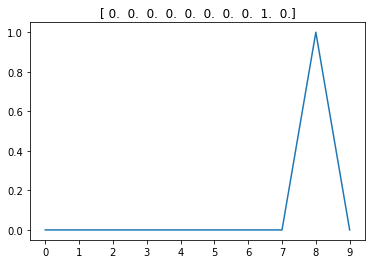

In [69]:
plt.title(train_labels[10])
plt.plot(train_labels[10]) # Plotting train_labels
plt.xticks(range(10)); # X-Axis

# Designing Neural Network Architecture

In [70]:
# Final hidden layer  with 10 outputs
# final stage is softmax
model = Sequential() # Sequential Model.
model.add(Dense(N_HIDDEN, input_shape=(784,))) # 1st Hidden Layer --> 128 neurons and input dimension ->784
model.add(Activation('relu')) # Activation function for 1st Hidden Layer
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))  # 2nd Hidden Layer --> 128 neurons
model.add(Activation('relu')) # Activation function for 2nd Hidden Layer
model.add(Dropout(DROPOUT))


model.add(Dense(NB_CLASSES)) # Final layer with 10 neurons == > no of outputs
model.add(Activation('softmax')) # Final layer activation will be 'softmax'

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
__________

In [71]:
print("Input Shape:",model.input_shape)
print("Output Shape:",model.output_shape)

Input Shape: (None, 784)
Output Shape: (None, 10)


### Compile network

Before making network ready for training we have to make sure to add below things:

1. A loss function: to measure how good the network is

2. An optimizer: to update network as it sees more data and reduce loss value

3. Metrics: to monitor performance of network

In [72]:
# Compiling a model in keras
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

### Train the Model

In [84]:
# Training a model in keras

# Once the model is compiled it can be trained with the fit() function
